# Data Science Project Workflow

## Project Overview
- **Objective**: Define the problem and goals of the project.
- **Milestones**: Data Collection, Exploration, Preprocessing, Advanced Analysis, Model Development, Deployment, and Final Documentation.

---

## Domain and Research Questions

### Domain of the Project
-Food and Agriculture Analytics
### Research Questions to be Answered
1. How does crop yield and soil fertility  correlate with economic impact and can these metrics accurately estimate economic impact.

2. Is there a significant correlation between changes in climatic factors and overall food production trends over the past two decades?

3. can climactic change accurately predict vulnerability level of certain crops?
---

# Team Information

## Student Information
- **Name**: [Insert Name]  
- **Email**: [Insert Email]  
- **Role**: Data Science Student  
- **Institution**: [Insert Institution Name]

## Additional Information
- **Project Timeline**: [Insert Start Date - End Date]  
- **Tools Used**: [Insert List of Tools or Frameworks, e.g., Python, SQLite, Pandas, etc.]  
- **Advisor/Instructor**: [Insert Advisor/Instructor Name, if applicable]  
- **Contact for Inquiries**: [Insert Email or Point of Contact]

---

# Milestone 1: Data Collection, Exploration, and Preprocessing

## Data Collection
- Acquire a dataset from reliable sources (e.g., Kaggle, UCI Repository, or APIs).
- **Scraping Data**:
  - Increase dataset size through web scraping or APIs (e.g., Selenium, BeautifulSoup).
  - Explore public repositories or other accessible sources for additional data.

## Dataset Description
- Create a table to explain:
  - **Column Names**
  - **Data Types**
  - **Descriptions**
  - **Potential Use in Analysis**

## Data Exploration
- Summary statistics (mean, median, variance).
- Identify missing values, duplicates, and outliers.
- Data distribution visualizations: histograms, box plots, scatter plots.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------- Helper Functions --------

def basic_stats(df):
    return df.describe().T[['mean', '50%', 'std']].rename(columns={'50%': 'median', 'std': 'variance'})
def detect_outliers(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=np.number).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = 1.5 * (q3 - q1)
        lower_bound = q1 - iqr
        upper_bound = q3 + iqr
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outliers
    return outlier_counts



## Preprocessing and Feature Engineering
- Handle missing values.
- Remove duplicates and outliers.
- Apply transformations (scaling, encoding, feature interactions).

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

def load_datasets_from_folder(folder_path):
    datasets = {}
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):  # Assuming the datasets are CSV files
            file_path = os.path.join(folder_path, filename)
            datasets[filename] = pd.read_csv(file_path)
    return datasets

def handle_imbalance(X_train, y_train):
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    print(f"Before SMOTE, counts of labels: {Counter(y_train)}")
    print(f"After SMOTE, counts of labels: {Counter(y_train_res)}")
    return X_train_res, y_train_res

def process_datasets_from_folder(folder_path):
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"Error: The folder '{folder_path}' does not exist.")
        return
    
    datasets = load_datasets_from_folder(folder_path)
    
    for filename, df in datasets.items():
        print(f"\n📂 Processing dataset: {filename}")
        
        # Check if target column is present
        target_column = df.columns[-1]  # Assuming the last column is the target
        X = df.drop(target_column, axis=1)  # Features
        y = df



---

In [9]:
datasets=load_datasets_from_folder('/Users/fouad/Desktop/Data science resit 2/Archive 2')
df=datasets['climate_change_impact_on_agriculture_2024.csv']
df2=datasets['Food_Production.csv']


In [10]:
basic_stats(df)

,mean,median,variance
Year,2007.088700,2007.000,10.084245
Average_Temperature_C,15.241299,15.175,11.466955
Total_Precipitation_mm,1611.663834,1611.160,805.016815
CO2_Emissions_MT,15.246608,15.200,8.589423
Crop_Yield_MT_per_HA,2.240017,2.170,0.998342
Extreme_Weather_Events,4.980900,5.000,3.165808
Irrigation_Access_%,55.248332,55.175,25.988305
Pesticide_Use_KG_per_HA,24.955735,24.930,14.490962
Fertilizer_Use_KG_per_HA,49.973708,49.635,28.711027
Soil_Health_Index,64.901278,64.650,20.195882


In [13]:
basic_stats(df2)

,mean,median,variance
Land use change,1.260465,0.200000,3.357730
Animal Feed,0.453488,0.000000,0.919200
Farm,3.469767,0.800000,7.083264
Processing,0.253488,0.100000,0.372475
Transport,0.195349,0.100000,0.158795
Packging,0.269767,0.100000,0.342633
Retail,0.069767,0.000000,0.110270
Total_emissions,5.972093,1.600000,10.501753
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),27.181547,7.000000,46.445959
Eutrophying emissions per kilogram (gPO₄eq per kilogram),46.141316,11.460000,82.808808


In [14]:
detect_outliers(df)

{'Year': np.int64(0),
 'Average_Temperature_C': np.int64(0),
 'Total_Precipitation_mm': np.int64(0),
 'CO2_Emissions_MT': np.int64(0),
 'Crop_Yield_MT_per_HA': np.int64(0),
 'Extreme_Weather_Events': np.int64(0),
 'Irrigation_Access_%': np.int64(0),
 'Pesticide_Use_KG_per_HA': np.int64(0),
 'Fertilizer_Use_KG_per_HA': np.int64(0),
 'Soil_Health_Index': np.int64(0),
 'Economic_Impact_Million_USD': np.int64(177)}

In [15]:
detect_outliers(df2)

{'Land use change': np.int64(8),
 'Animal Feed': np.int64(10),
 'Farm': np.int64(6),
 'Processing': np.int64(5),
 'Transport': np.int64(5),
 'Packging': np.int64(7),
 'Retail': np.int64(0),
 'Total_emissions': np.int64(6),
 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)': np.int64(4),
 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)': np.int64(4),
 'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)': np.int64(4),
 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)': np.int64(2),
 'Freshwater withdrawals per 100g protein (liters per 100g protein)': np.int64(2),
 'Freshwater withdrawals per kilogram (liters per kilogram)': np.int64(3),
 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)': np.int64(3),
 'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)': np.int64(3),
 'Land use per 1000kcal (m² per 1000kcal)': np.int64(6),
 'Land use per kilogram (m² per kilogram)': np.int64(5),
 'Land use per 100g protein (m²

# Milestone 2: Advanced Data Analysis and Feature Engineering

In [16]:
df2.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

In [17]:
df.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [18]:
# -------- Derived Features --------

# For climate change dataset (df)
df["Climate_Stress_Index"] = (
    df["Average_Temperature_C"] * 0.4 +
    df["CO2_Emissions_MT"] * 0.3 +
    df["Extreme_Weather_Events"] * 0.3
)

df["Input_Intensity_Score"] = (
    df["Pesticide_Use_KG_per_HA"] +
    df["Fertilizer_Use_KG_per_HA"] +
    df["Irrigation_Access_%"]
)

df["Yield_Efficiency"] = df["Crop_Yield_MT_per_HA"] / (
    df["Fertilizer_Use_KG_per_HA"] + df["Pesticide_Use_KG_per_HA"]
)

# For food production dataset (df2)
emission_sources = [
    'Land use change', 'Animal Feed', 'Farm', 'Processing', 
    'Transport', 'Packging', 'Retail'
]

df2["Total_Supply_Chain_Emissions"] = df2[emission_sources].sum(axis=1)

# Avoid divide-by-zero and invalid operations
df2["Water_Use_Efficiency"] = df2["Total_emissions"] / (
    df2["Freshwater withdrawals per kilogram (liters per kilogram)"].replace(0, np.nan)
)

df2["GHG_Intensity_Index"] = df2["Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"] / (
    df2["Land use per 1000kcal (m² per 1000kcal)"].replace(0, np.nan)
)


## Statistical Analysis
- Conduct tests such as t-tests, ANOVA, and chi-squared to explore relationships.

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# -------- Helper Functions --------

def detect_outliers_iqr(df):
    outlier_indices = []
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)].index
        outlier_indices.extend(outliers)
    return list(set(outlier_indices))

def preprocess_dataframe(df):
    print("\n🔍 Initial shape:", df.shape)

    # Remove duplicates
    df = df.drop_duplicates()
    print("✔️ Duplicates removed. Shape:", df.shape)

    # Remove rows with all NaNs
    df = df.dropna(how='all')

    # Handle missing values separately by type
    num_cols = df.select_dtypes(include=np.number).columns
    cat_cols = df.select_dtypes(include='object').columns

    numeric_imputer = SimpleImputer(strategy='mean')
    categorical_imputer = SimpleImputer(strategy='most_frequent')

    df[num_cols] = numeric_imputer.fit_transform(df[num_cols])
    df[cat_cols] = categorical_imputer.fit_transform(df[cat_cols])
    print("🛠️ Missing values handled.")

    # Remove outliers using IQR
    outlier_indices = detect_outliers_iqr(df)
    df = df.drop(index=outlier_indices)
    print(f"🚮 Outliers removed: {len(outlier_indices)} | New shape: {df.shape}")

    # Feature transformations
    numeric_features = list(num_cols)
    categorical_features = list(cat_cols)

    # Preprocessing pipelines
    numeric_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

    # Apply preprocessing
    processed = preprocessor.fit_transform(df)

    

    
    return [df,numeric_imputer,categorical_imputer,numeric_features, categorical_features,numeric_pipeline,categorical_pipeline,
            preprocessor, processed]





In [20]:
df_outliers=detect_outliers_iqr(df)
df2_outliers=detect_outliers_iqr(df2)


In [21]:
df_list=preprocess_dataframe(df)
df2_list=preprocess_dataframe(df2)



🔍 Initial shape: (10000, 18)
✔️ Duplicates removed. Shape: (10000, 18)
🛠️ Missing values handled.
🚮 Outliers removed: 887 | New shape: (9113, 18)

🔍 Initial shape: (43, 26)
✔️ Duplicates removed. Shape: (43, 26)
🛠️ Missing values handled.
🚮 Outliers removed: 27 | New shape: (16, 26)


In [22]:
df=df_list[0]
df2=df2_list[0]

In [24]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Example: Create binned categories for the independent variables
df['Crop_Yield_Level'] = pd.qcut(df['Crop_Yield_MT_per_HA'], q=3, labels=['Low', 'Medium', 'High'])
df['Soil_Health_Level'] = pd.qcut(df['Soil_Health_Index'], q=3, labels=['Low', 'Medium', 'High'])

# Fit the two-way ANOVA model
model = ols('Economic_Impact_Million_USD ~ C(Crop_Yield_Level) * C(Soil_Health_Level)', data=df).fit()

# Get the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)



                                                sum_sq      df            F  \
C(Crop_Yield_Level)                       5.508416e+08     2.0  3460.086990   
C(Soil_Health_Level)                      6.108003e+04     2.0     0.383671   
C(Crop_Yield_Level):C(Soil_Health_Level)  1.701379e+05     4.0     0.534357   
Residual                                  7.246728e+08  9104.0          NaN   

                                            PR(>F)  
C(Crop_Yield_Level)                       0.000000  
C(Soil_Health_Level)                      0.681366  
C(Crop_Yield_Level):C(Soil_Health_Level)  0.710503  
Residual                                       NaN  


In [25]:
from scipy.stats import chi2_contingency

# Bin extreme weather into high vs. low
df["Extreme_Weather_Level"] = pd.cut(df["Extreme_Weather_Events"], bins=[-1, 5, 100], labels=["Low", "High"])

# Contingency table
contingency = pd.crosstab(df["Region"], df["Extreme_Weather_Level"])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-squared: χ² = {chi2:.3f}, p = {p:.3f}")


Chi-squared: χ² = 40.643, p = 0.169


In [26]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm

# --- 1) Filter to the past two decades ---
# Uses the latest year in your data to define a rolling 20-year window
end_year = int(df['Year'].max())
start_year = end_year - 19
df_20y = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)].copy()

# --- 2) Specify climate variables you want to test ---
climate_vars = ['Average_Temperature_C',
                'Total_Precipitation_mm',
                'CO2_Emissions_MT',
                'Extreme_Weather_Events']  # add/remove as needed

# --- 3) Build reduced vs full models ---
# Reduced: production trend explained by time + geography
reduced_formula = 'Crop_Yield_MT_per_HA ~ Year + C(Region) + C(Country)'

# Full: add climatic factors
full_formula = ('Crop_Yield_MT_per_HA ~ Year + ' +
                ' + '.join(climate_vars) +
                ' + C(Region) + C(Country)')

reduced = ols(reduced_formula, data=df_20y).fit()
full = ols(full_formula, data=df_20y).fit()

# --- 4) Partial F-test: do climate vars add explanatory power beyond trend/controls? ---
# anova_lm with two nested models performs the incremental (partial) F-test
model_comp = sm.stats.anova_lm(reduced, full)
print(f"Two-decade window: {start_year}-{end_year}")
print("\nIncremental ANOVA (Reduced vs Full):")
print(model_comp)

# --- 5) Joint Wald test for climate terms (redundancy check) ---
# H0: All climate coefficients = 0 (no climate effect)
hypothesis = ' = 0, '.join(climate_vars) + ' = 0'
wald_test = full.f_test(hypothesis)
print("\nJoint Wald test for climate variables:")
print(wald_test)

# --- 6) Helpful fit metrics ---
print("\nModel fit comparison:")
print(f"Reduced R^2: {reduced.rsquared:.4f}")
print(f"Full    R^2: {full.rsquared:.4f}")
print(f"ΔR^2: {full.rsquared - reduced.rsquared:.4f}")


Two-decade window: 2005-2024

Incremental ANOVA (Reduced vs Full):
   df_resid          ssr  df_diff     ss_diff           F        Pr(>F)
0    5143.0  4658.307603      0.0         NaN         NaN           NaN
1    5139.0  4303.211453      4.0  355.096151  106.016119  6.489671e-87

Joint Wald test for climate variables:
<F test: F=106.01611947356066, p=6.489671181712247e-87, df_denom=5.14e+03, df_num=4>

Model fit comparison:
Reduced R^2: 0.0079
Full    R^2: 0.0835
ΔR^2: 0.0756


In [27]:
df.to_csv('climatenew.csv')
df2.to_csv('foodnew.csv')

## Feature Engineering
- Create derived features based on domain knowledge.
- Apply transformations such as normalization, log scaling, or polynomial features.

In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# -------- Helper Functions --------




## Data Visualization
- Generate insightful visualizations:
  - Correlation heatmaps, pair plots.
  - Trends and comparisons using bar charts, line charts, and dashboards.

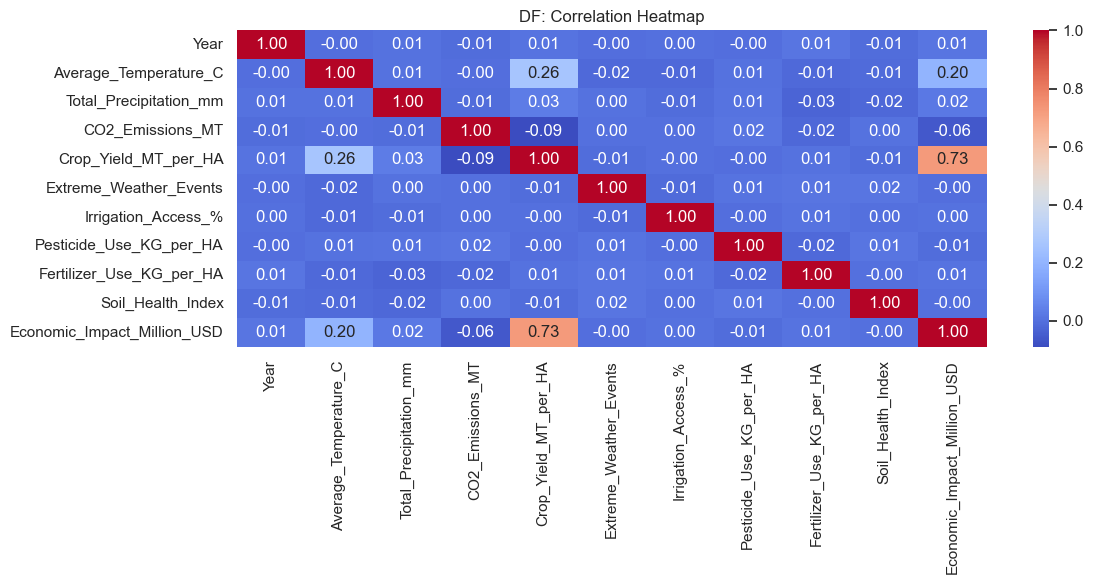

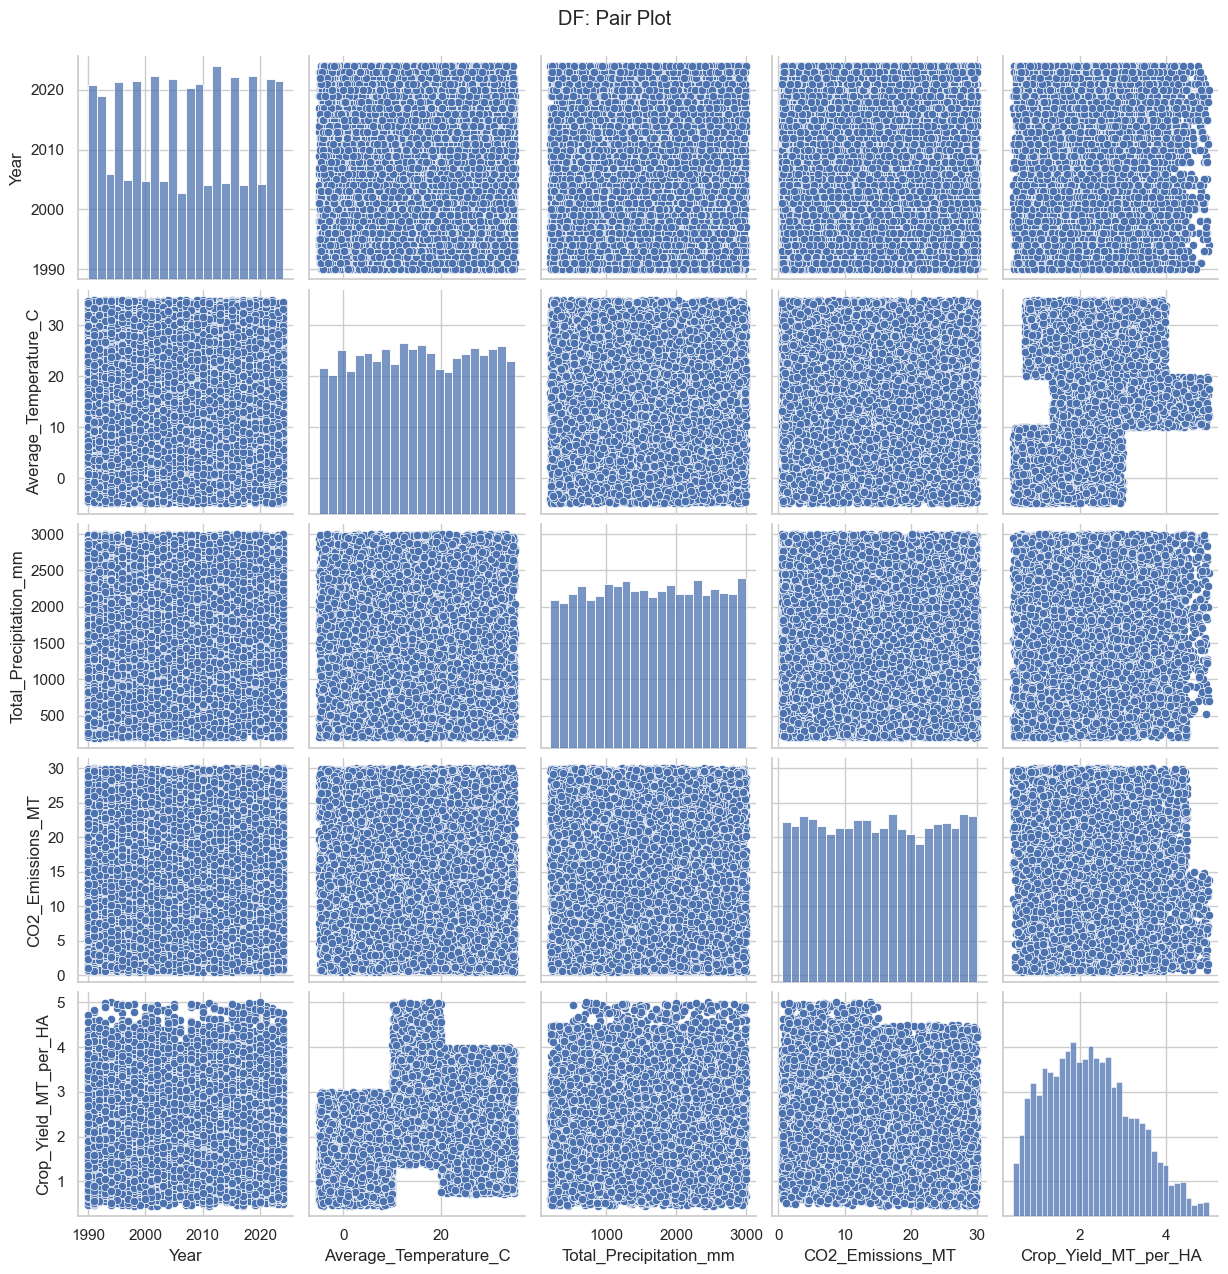

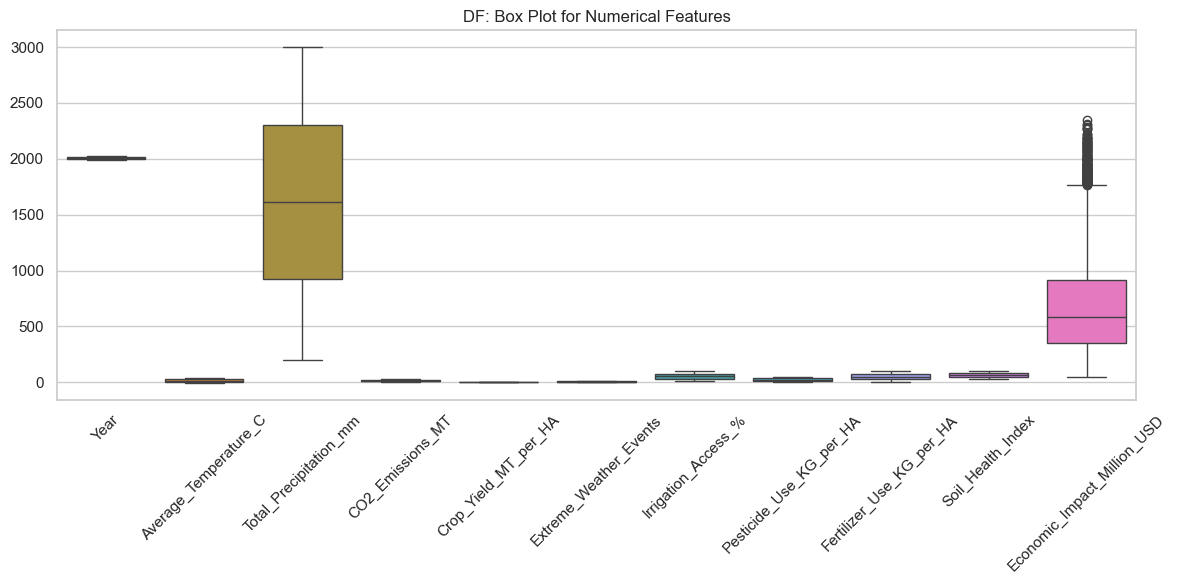

/var/folders/9n/5222p1ws52105pt30psbcxb40000gn/T/ipykernel_78110/916670823.py:42: UserWarning: Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/9n/5222p1ws52105pt30psbcxb40000gn/T/ipykernel_78110/916670823.py:42: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/ds_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ds_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


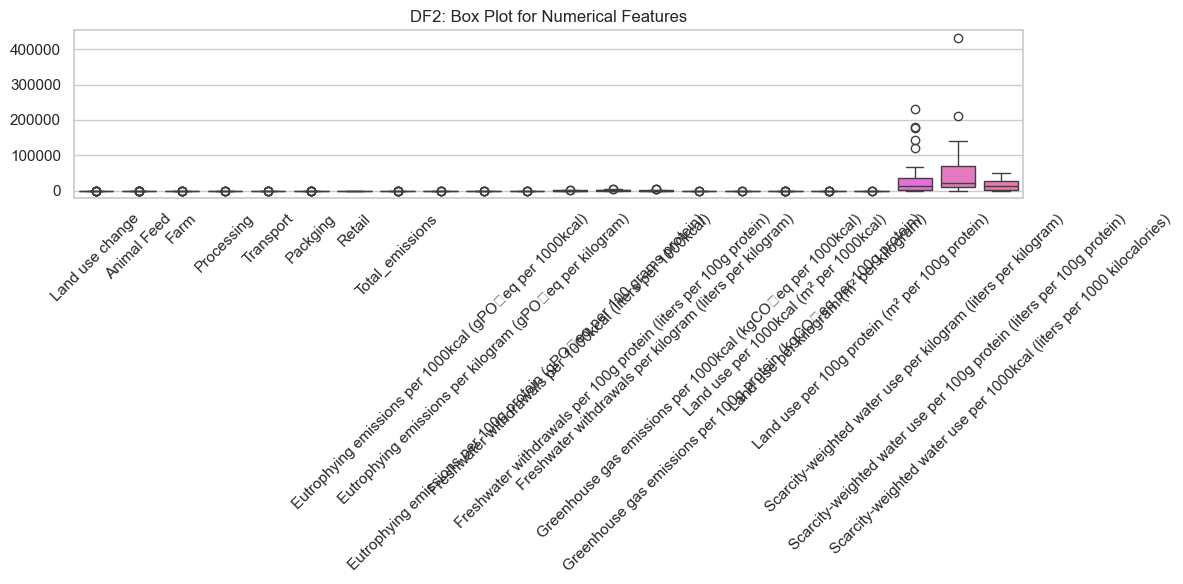

In [29]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('climate_change_impact_on_agriculture_2024.csv')
df2=pd.read_csv('Food_Production.csv')

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# --- Visualizations for df (climate data) ---

# Correlation Heatmap
plt.figure()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("DF: Correlation Heatmap")
plt.tight_layout()
plt.show()

# Pair Plot (first 5 numeric columns)
selected_df_cols = df.select_dtypes(include='number').columns[:5]
sns.pairplot(df[selected_df_cols])
plt.suptitle("DF: Pair Plot", y=1.02)
plt.show()

# Box Plot
plt.figure()
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("DF: Box Plot for Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Box Plot
plt.figure()
sns.boxplot(data=df2.select_dtypes(include='number'))
plt.title("DF2: Box Plot for Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Chart: Avg Total Emissions by Food Type
if "Food_type" in df2.columns:
    plt.figure()
    df2.groupby("Food_type")["Total_emissions"].mean().sort_values().plot(kind="barh", color="skyblue")
    plt.title("DF2: Avg Total Emissions by Food Type")
    plt.xlabel("Total Emissions")
    plt.tight_layout()
    plt.show()



---


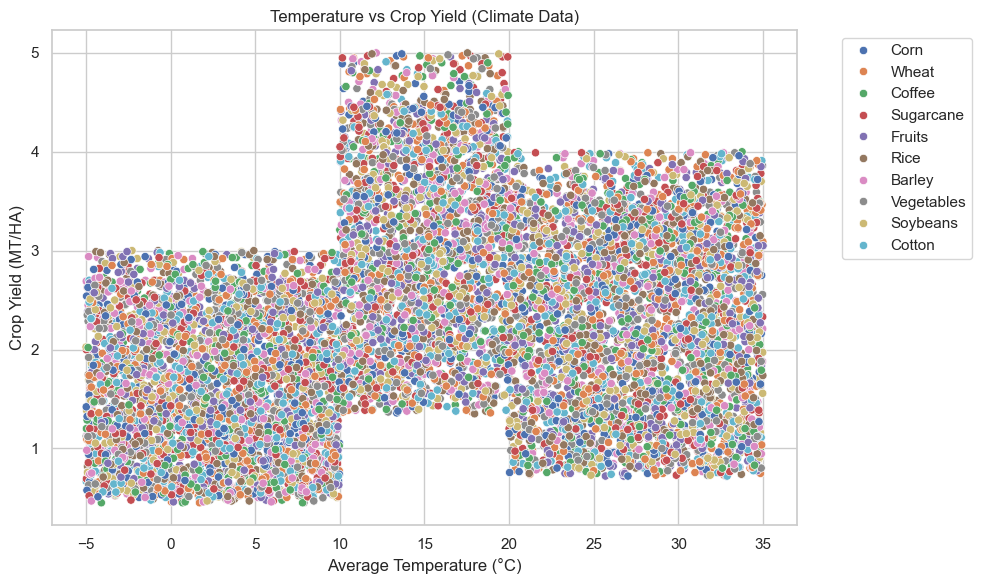

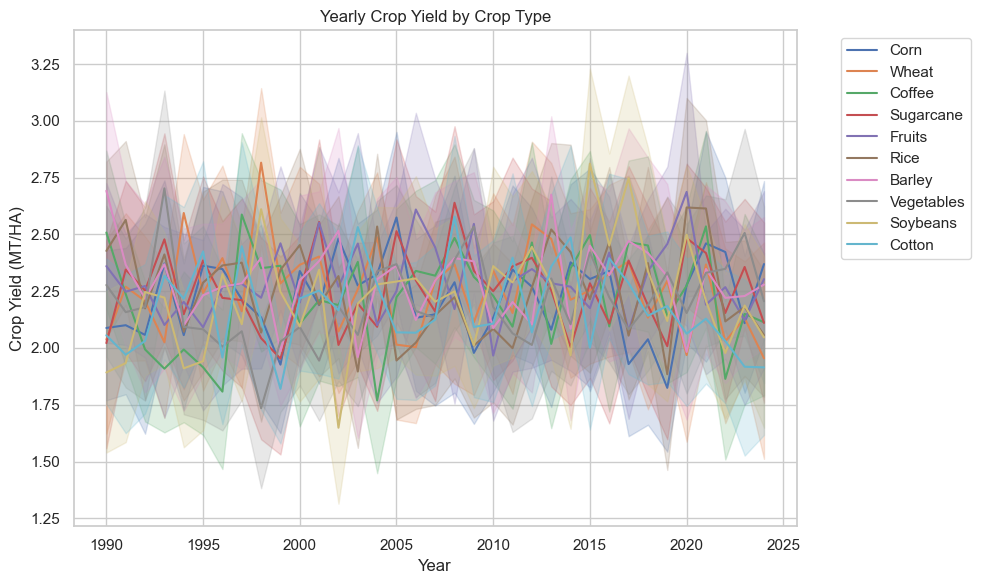

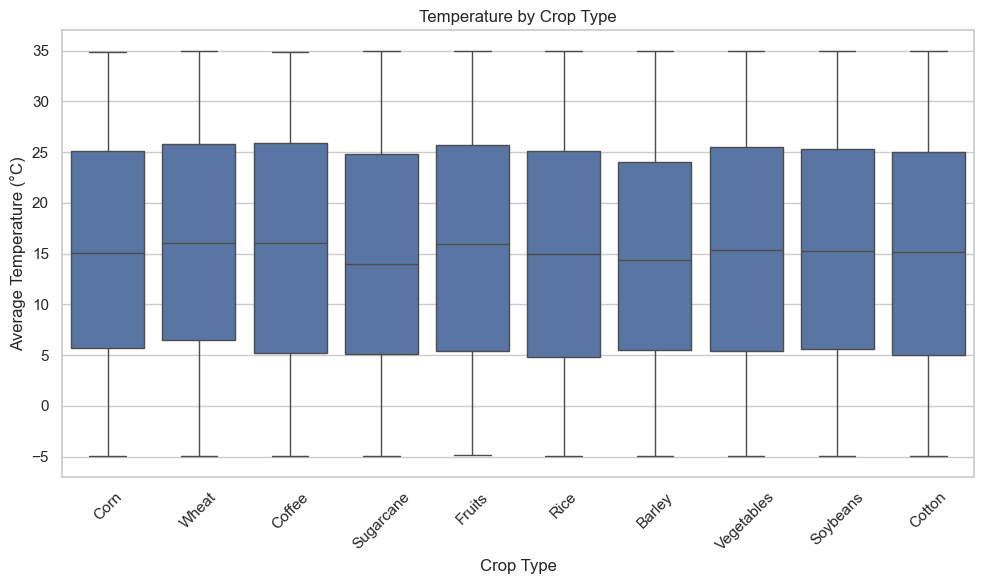

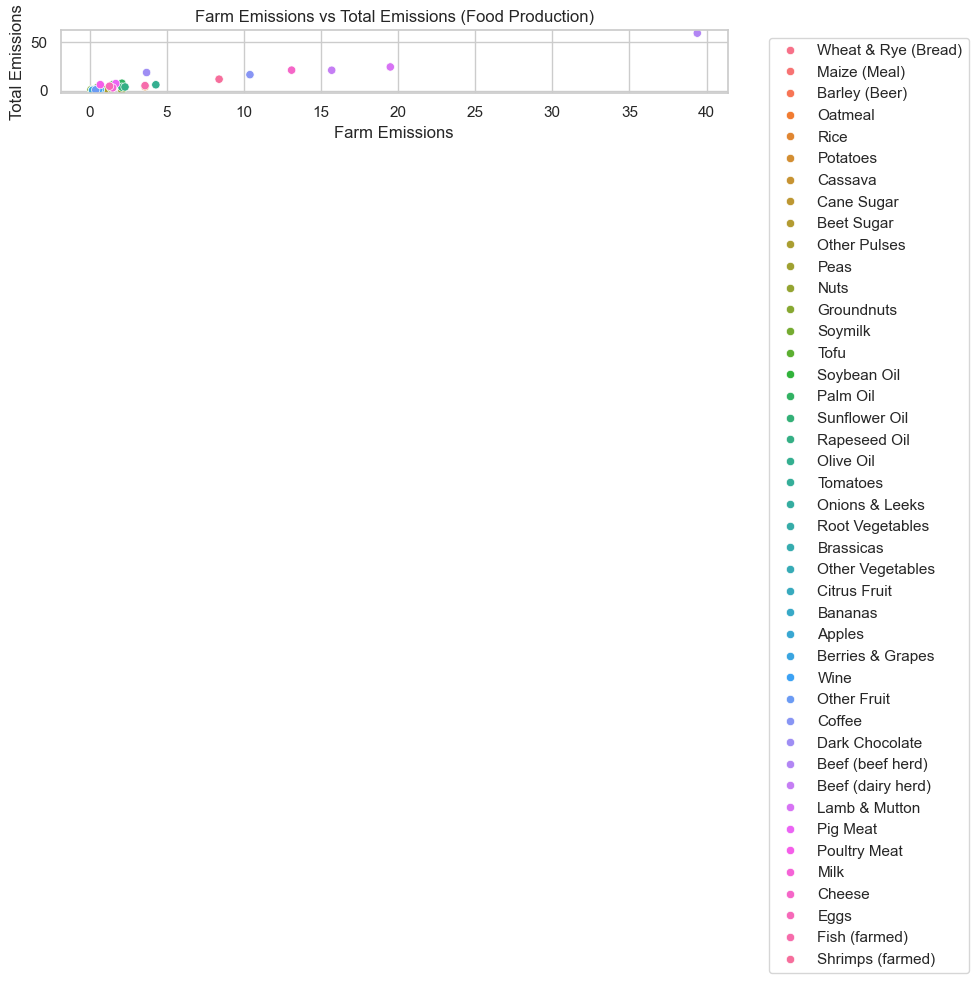

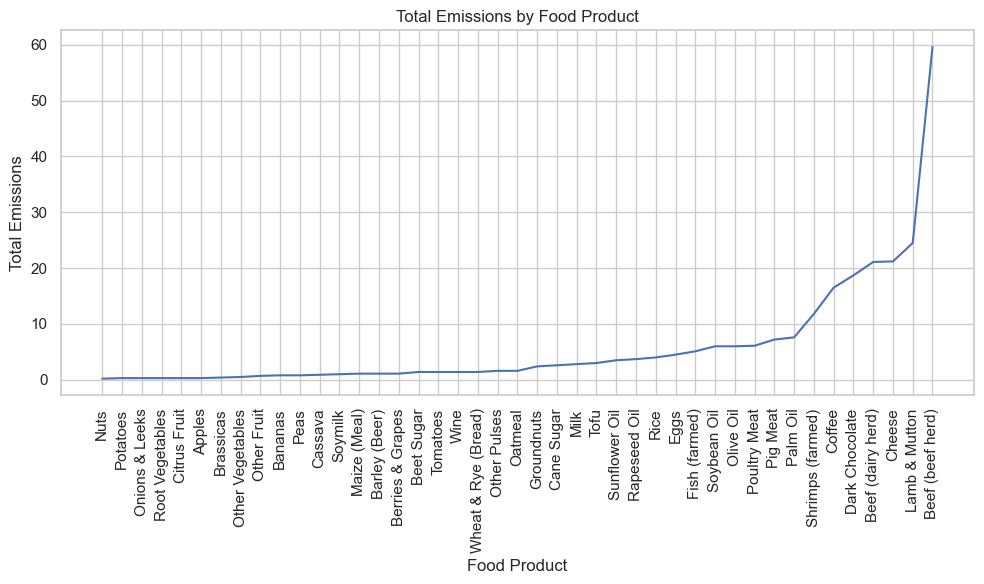

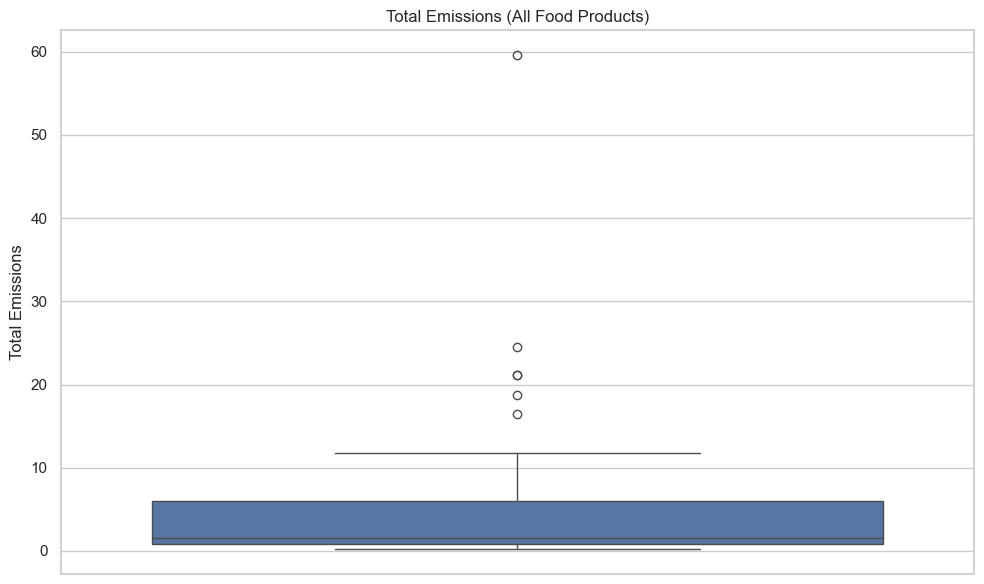

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# --- CLIMATE DATA (df / climate_df) ---

# Scatter Plot: Temperature vs Crop Yield
plt.figure()
sns.scatterplot(data=df, x="Average_Temperature_C", y="Crop_Yield_MT_per_HA", hue="Crop_Type")
plt.title("Temperature vs Crop Yield (Climate Data)")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Crop Yield (MT/HA)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Line Plot: Yearly Crop Yield by Crop Type
plt.figure()
sns.lineplot(data=df, x="Year", y="Crop_Yield_MT_per_HA", hue="Crop_Type")
plt.title("Yearly Crop Yield by Crop Type")
plt.xlabel("Year")
plt.ylabel("Crop Yield (MT/HA)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Box Plot: Temperature by Crop Type
plt.figure()
sns.boxplot(data=df, x="Crop_Type", y="Average_Temperature_C")
plt.title("Temperature by Crop Type")
plt.xlabel("Crop Type")
plt.ylabel("Average Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- FOOD PRODUCTION DATA (df2 / food_df) ---

# Scatter Plot: Farm Emissions vs Total Emissions
plt.figure()
sns.scatterplot(data=df2, x="Farm", y="Total_emissions", hue="Food product")
plt.title("Farm Emissions vs Total Emissions (Food Production)")
plt.xlabel("Farm Emissions")
plt.ylabel("Total Emissions")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Line Plot: Total Emissions by Food Product
plt.figure()
food_df_sorted = df2.sort_values(by="Total_emissions")
sns.lineplot(data=food_df_sorted, x="Food product", y="Total_emissions")
plt.title("Total Emissions by Food Product")
plt.xlabel("Food Product")
plt.ylabel("Total Emissions")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Box Plot: Total Emissions
plt.figure()
sns.boxplot(data=df2, y="Total_emissions")
plt.title("Total Emissions (All Food Products)")
plt.ylabel("Total Emissions")
plt.tight_layout()
plt.show()


# Milestone 3: Machine Learning Model Development and Optimization

## Model Selection
- Choose appropriate models for the problem type (classification, regression, clustering, etc.).


In [31]:
df=df_list[0]
df2=df2_list[0]

In [44]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor

rf1 = RandomForestRegressor(n_estimators=100, random_state=42)

clf1=LogisticRegression(max_iter=1000)

reg_model = LinearRegression()
clf_model = LogisticRegression(max_iter=1000)
kmeans = KMeans(n_clusters=3, random_state=42)
reg_model2 = LinearRegression()
clf_model2 = LogisticRegression(max_iter=1000)
kmeans2 = KMeans(n_clusters=3, random_state=42)
lin_reg1=LinearRegression()


## Model Training
- Split data into training, validation, and testing sets.
- Address imbalances using techniques like SMOTE or stratified sampling.

In [33]:
df=pd.read_csv('climatenew.csv')
df2=pd.read_csv('foodnew.csv')

In [47]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Extract columns
xsoil = df[['Soil_Health_Index']]
xcrop = df[['Crop_Yield_MT_per_HA']]
yeconomic = df[['Economic_Impact_Million_USD']]

# Handle missing values
si = SimpleImputer(strategy='mean')
xsoil = si.fit_transform(xsoil)
xcrop = si.fit_transform(xcrop)
yeconomic = si.fit_transform(yeconomic)

# Scale numeric features
scaler = StandardScaler()
xsoil = scaler.fit_transform(xsoil)
xcrop = scaler.fit_transform(xcrop)

# Combine into DataFrame
xtemp = pd.DataFrame({
    'xsoil': xsoil.flatten(),
    'xcrop': xcrop.flatten()
})

# Optional: flatten yeconomic if it's 2D
yeconomic = yeconomic.flatten()

# Train/test split
xtemp_train, xtemp_, yeconomic_train, yeconomic_ = train_test_split(
    xtemp, yeconomic, test_size=0.3, random_state=42
)


xclim_stress = df['Climate_Stress_Index']
yclim_vul = (df['Crop_Yield_MT_per_HA'] < df['Crop_Yield_MT_per_HA'].median()).astype(int)

xclim_stress_train, xclim_stress_, yclim_vul_train, yclim_vul_ = train_test_split(
    xclim_stress, yclim_vul, test_size=0.3, stratify=yclim_vul, random_state=42
)

smote = SMOTE(random_state=42)
xclim_stress_bal, yclim_vul_train_bal = smote.fit_resample(
    xclim_stress_train.to_frame(), yclim_vul_train
)


# Create binary classification target for climate data
df["Stress_Class"] = (df["Climate_Stress_Index"] > df["Climate_Stress_Index"].median()).astype(int)

X_climate = df_list[8]  # Processed features from pipeline
y_climate = df["Stress_Class"]

# Split with stratification for class balance
X_train_clim, X_temp_clim, y_train_clim, y_temp_clim = train_test_split(
    X_climate, y_climate, test_size=0.3, stratify=y_climate, random_state=42
)
X_val_clim, X_test_clim, y_val_clim, y_test_clim = train_test_split(
    X_temp_clim, y_temp_clim, test_size=0.5, stratify=y_temp_clim, random_state=42
)

# Apply SMOTE
smote_clim = SMOTE(random_state=42)
X_train_clim_bal, y_train_clim_bal = smote_clim.fit_resample(X_train_clim, y_train_clim)

print("🌍 Climate Dataset class balance before SMOTE:\n", y_train_clim.value_counts())
print("🌍 Climate Dataset class balance after SMOTE:\n", pd.Series(y_train_clim_bal).value_counts())


# -------------------- FOOD DATASET (df2) --------------------

# Create binary classification target for food data
df2["Emission_Class"] = (df2["Total_emissions"] > df2["Total_emissions"].median()).astype(int)

X_food = df2_list[8]  # Processed features from pipeline
y_food = df2["Emission_Class"]

# Split with stratification for class balance
X_train_food, X_temp_food, y_train_food, y_temp_food = train_test_split(
    X_food, y_food, test_size=0.3, stratify=y_food, random_state=42
)
X_val_food, X_test_food, y_val_food, y_test_food = train_test_split(
    X_temp_food, y_temp_food, test_size=0.5, stratify=y_temp_food, random_state=42
)

# Dynamically adjust k_neighbors for SMOTE based on minority class size
minority_count = y_train_food.value_counts().min()
smote_k = min(5, minority_count - 1) if minority_count > 1 else 1
smote_food = SMOTE(random_state=42, k_neighbors=smote_k)

# Apply SMOTE
X_train_food_bal, y_train_food_bal = smote_food.fit_resample(X_train_food, y_train_food)

print("🍽️ Food Dataset class balance before SMOTE:\n", y_train_food.value_counts())
print("🍽️ Food Dataset class balance after SMOTE:\n", pd.Series(y_train_food_bal).value_counts())


🌍 Climate Dataset class balance before SMOTE:
 Stress_Class
0    3191
1    3188
Name: count, dtype: int64
🌍 Climate Dataset class balance after SMOTE:
 Stress_Class
1    3191
0    3191
Name: count, dtype: int64
🍽️ Food Dataset class balance before SMOTE:
 Emission_Class
1    6
0    5
Name: count, dtype: int64
🍽️ Food Dataset class balance after SMOTE:
 Emission_Class
0    6
1    6
Name: count, dtype: int64


## Model Evaluation
- Metrics to consider: Accuracy, Precision, Recall, F1-score, RMSE, etc.
- Visual tools: Confusion matrices, ROC curves.

In [49]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error
)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
clf_model.fit(X_train_clim_bal, y_train_clim_bal)     # Classification (SMOTE balanced)
clf1.fit(xclim_stress_bal, yclim_vul_train_bal)
reg_model.fit(X_train_clim, y_train_clim)             # Regression (original training data)
lin_reg1.fit(xtemp_train,yeconomic_train)
rf1.fit(xtemp_train, yeconomic_train)
kmeans.fit(X_climate) 
clf_model2.fit(X_train_food_bal, y_train_food_bal)
reg_model2.fit(X_train_food, y_train_food)
kmeans2.fit(X_food)

# ------ Classification Metrics ------
y_pred_clim = clf_model.predict(X_test_clim)
print("🌍 Climate Classification Metrics:")
print("Accuracy:", accuracy_score(y_test_clim, y_pred_clim))

print('lin_reg1')
yeco_lin_pred=lin_reg1.predict(xtemp_)
rmse_lin_reg1 =np.sqrt(mean_squared_error(yeconomic_,yeco_lin_pred))
print('lin reg1 y eco RMSE:',rmse_lin_reg1)

print('rf1')
y_eco_rf1_pred=rf1.predict(xtemp_)
rmse_rf1=np.sqrt(mean_squared_error(yeconomic_,y_eco_rf1_pred))
print('rf1 RMSE:',rmse_rf1)

print('clf1')


y_pred_clf1 = clf1.predict(xclim_stress_.to_frame())


print('clf1 accuracy:', accuracy_score(yclim_vul_, y_pred_clf1))


# ------ Regression Metrics ------
y_pred_reg_clim = reg_model.predict(X_test_clim)
rmse_clim = np.sqrt(mean_squared_error(y_test_clim, y_pred_reg_clim))
print("🌍 Climate Regression RMSE:", rmse_clim)

# ------ Clustering Metrics ------
try:
    cluster_labels_clim = kmeans.fit_predict(X_climate)
    sil_score_clim = silhouette_score(X_climate, cluster_labels_clim)
    print("🌍 Climate Clustering Silhouette Score:", sil_score_clim)
except Exception as e:
    print("Clustering for climate dataset failed:", e)
# ------ Classification Metrics ------
y_pred_food = clf_model2.predict(X_test_food)
print("\n🍽️ Food Classification Metrics:")
print("Accuracy:", accuracy_score(y_test_food, y_pred_food))




# ------ Regression Metrics ------
y_pred_reg_food = reg_model2.predict(X_test_food)
rmse_food = np.sqrt(mean_squared_error(y_test_food, y_pred_reg_food))
print("🍽️ Food Regression RMSE:", rmse_food)

# ------ Clustering Metrics ------
cluster_labels_food = kmeans2.fit_predict(X_food)
sil_score_food = silhouette_score(X_food, cluster_labels_food)
print("🍽️ Food Clustering Silhouette Score:", sil_score_food)


🌍 Climate Classification Metrics:
Accuracy: 0.9978054133138259
lin_reg1
lin reg1 y eco RMSE: 264.8116184518145
rf1
rf1 RMSE: 293.1515136256226
clf1
clf1 accuracy: 0.5724213606437454
🌍 Climate Regression RMSE: 0.27047403213331006
🌍 Climate Clustering Silhouette Score: 0.08400659642038383

🍽️ Food Classification Metrics:
Accuracy: 1.0
🍽️ Food Regression RMSE: 0.305959969664308
🍽️ Food Clustering Silhouette Score: 0.18270558637219075


## Hyperparameter Tuning
- Techniques: Grid Search, Random Search, or advanced methods like Bayesian Optimization.

## Model Comparison
- Compare multiple models and justify the final model selection.

In [50]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    mean_squared_error, r2_score, mean_absolute_error, silhouette_score
)
import numpy as np

# ---------------------------------------------
# Models
# ---------------------------------------------
regressors = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Support Vector Classifier": SVC(probability=True)
}

clusterers = {
    "KMeans": KMeans(n_clusters=3, random_state=42),
    "Agglomerative Clustering": AgglomerativeClustering(n_clusters=3)
}

# ---------------------------------------------
# Regressor Evaluation
# ---------------------------------------------
def evaluate_regressors(X, y):
    results = []
    for name, model in regressors.items():
        model.fit(X, y)
        y_pred = model.predict(X)
        results.append({
            "name": name,
            "model": model,
            "y_pred": y_pred,
            "rmse": np.sqrt(mean_squared_error(y, y_pred)),
            "mae": mean_absolute_error(y, y_pred),
            "r2": r2_score(y, y_pred)
        })
    return results

# ---------------------------------------------
# Classifier Evaluation
# ---------------------------------------------
def evaluate_classifiers(X, y):
    results = []
    for name, model in classifiers.items():
        model.fit(X, y)
        y_pred = model.predict(X)
        results.append({
            "name": name,
            "model": model,
            "y_pred": y_pred,
            "accuracy": accuracy_score(y, y_pred),
            "precision": precision_score(y, y_pred),
            "recall": recall_score(y, y_pred),
            "f1": f1_score(y, y_pred)
        })
    return results

# ---------------------------------------------
# Clustering Evaluation
# ---------------------------------------------
def evaluate_clustering(X):
    results = []
    for name, model in clusterers.items():
        labels = model.fit_predict(X)
        results.append({
            "name": name,
            "model": model,
            "labels": labels,
            "silhouette_score": silhouette_score(X, labels)
        })
    return results




In [51]:
# ----------------------------- Evaluate for Climate Dataset -----------------------------

# Regression: Predict Climate_Stress_Index
reg_results_df = pd.DataFrame(evaluate_regressors(X_train_clim_bal, df.loc[y_train_clim_bal.index, "Climate_Stress_Index"]))

# Classification: Predict Stress_Class
clf_results_df = pd.DataFrame(evaluate_classifiers(X_train_clim_bal, y_train_clim_bal))

# Clustering: Unsupervised learning on features
cluster_results_df = pd.DataFrame(evaluate_clustering(X_train_clim_bal))

# ----------------------------- Evaluate for Food Dataset -----------------------------

# Regression: Predict Total_emissions
reg_results_df2 = pd.DataFrame(evaluate_regressors(X_train_food_bal, df2.loc[y_train_food_bal.index, "Total_emissions"]))

# Classification: Predict Emission_Class
clf_results_df2 = pd.DataFrame(evaluate_classifiers(X_train_food_bal, y_train_food_bal))

# Clustering: Unsupervised learning on features
cluster_results_df2 = pd.DataFrame(evaluate_clustering(X_train_food_bal))

In [52]:
print(reg_results_df)
print(clf_results_df)
print(cluster_results_df)


                       name  \
0         Linear Regression   
1   Random Forest Regressor   
2  Support Vector Regressor   

                                               model  \
0                                 LinearRegression()   
1  (DecisionTreeRegressor(max_features=1.0, rando...   
2                                              SVR()   

                                              y_pred      rmse       mae  \
0  [11.347812337992742, 13.306949016405712, 12.66...  5.366926  4.488491   
1  [9.39559000000001, 12.944499999999996, 15.5120...  2.042192  1.689099   
2  [11.11198293767117, 14.510026636871133, 13.215...  5.092975  4.136044   

         r2  
0  0.011162  
1  0.856825  
2  0.109534  
                        name  \
0        Logistic Regression   
1   Random Forest Classifier   
2  Support Vector Classifier   

                                               model  \
0                  LogisticRegression(max_iter=1000)   
1  (DecisionTreeClassifier(max_features='sqrt', 

In [53]:
print(reg_results_df2)
print(clf_results_df2)
print(cluster_results_df2)

                       name  \
0         Linear Regression   
1   Random Forest Regressor   
2  Support Vector Regressor   

                                               model  \
0                                 LinearRegression()   
1  (DecisionTreeRegressor(max_features=1.0, rando...   
2                                              SVR()   

                                              y_pred      rmse       mae  \
0  [1.4000000000000015, 1.0999999999999985, 1.100...  0.230909  0.102982   
1  [1.1120000000000003, 1.2049999999999985, 0.952...  0.250708  0.221500   
2  [1.299762494190375, 1.0806850188989756, 1.0003...  0.354184  0.245371   

         r2  
0  0.852120  
1  0.825674  
2  0.652074  
                        name  \
0        Logistic Regression   
1   Random Forest Classifier   
2  Support Vector Classifier   

                                               model  \
0                  LogisticRegression(max_iter=1000)   
1  (DecisionTreeClassifier(max_features='sqrt', 

## Visualization for Research Questions
- This section will include the visualizations that provide insights for the research questions defined earlier.  
- **Development Steps for Answering the Research Questions**:
  1. During **Exploratory Data Analysis (EDA)**, visualize initial patterns or trends related to the research questions.
  2. During **Model Evaluation**, provide visualizations to interpret model performance with respect to the research questions.
  3. During the **Final Analysis and Reporting**, present polished visualizations that summarize findings for each research question.

- Create the visualizations for each research question you defined, prove it or answer it, then add a markdown cell after each visual to comment and explain how the visual support your research question.


---


# Milestone 4: Deployment and Monitoring

## Deployment
- Deploy the model as a REST API (Flask, FastAPI) or interactive dashboards (Streamlit, Dash).
- Host on cloud platforms (AWS, Azure, GCP) or local servers.

In [54]:
df.columns

Index(['Unnamed: 0', 'Year', 'Country', 'Region', 'Crop_Type',
       'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
       'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD', 'Climate_Stress_Index',
       'Input_Intensity_Score', 'Yield_Efficiency', 'Crop_Yield_Level',
       'Soil_Health_Level', 'Extreme_Weather_Level', 'Stress_Class'],
      dtype='object')

In [55]:
df2.columns

Index(['Unnamed: 0', 'Food product', 'Land use change', 'Animal Feed', 'Farm',
       'Processing', 'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per

In [ ]:
import pandas as pd
import joblib
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# --- Load Data ---
df = pd.read_csv('climatenew.csv')
df2 = pd.read_csv('foodnew.csv')

# --- Select Features and Targets ---
X_climate = df[['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Irrigation_Access_%', 'Soil_Health_Index']]
y_climate_reg = df['Crop_Yield_MT_per_HA']
y_climate_class = df['Extreme_Weather_Level']

X_food = df2[['Land use change', 'Animal Feed', 'Farm', 'Processing', 'Transport']]
y_food_reg = df2['Total_emissions']


# --- Define Emission_Level Classification ---

y_food_class = df2['Emission_Level']

# --- Encode Food Classification Target ---
le = LabelEncoder()
y_food_class_encoded = le.fit_transform(y_food_class)

# --- Check if enough classes for classification ---
unique_classes = len(set(y_food_class_encoded))
if unique_classes < 2:
    skip_food_classification = True
    print("⚠️ Not enough classes for food classification. Skipping food classification models.")
else:
    skip_food_classification = False

# --- Train-Test Split ---
Xc_train, Xc_test, yc_reg_train, yc_reg_test = train_test_split(X_climate, y_climate_reg, test_size=0.2, random_state=42)
Xc_train2, Xc_test2, yc_class_train, yc_class_test = train_test_split(X_climate, y_climate_class, test_size=0.2, random_state=42)

Xf_train, Xf_test, yf_reg_train, yf_reg_test = train_test_split(X_food, y_food_reg, test_size=0.2, random_state=42)
if not skip_food_classification:
    Xf_train2, Xf_test2, yf_class_train, yf_class_test = train_test_split(X_food, y_food_class_encoded, test_size=0.2, random_state=42)

# --- Train Models ---

# Climate Regression Models
model_climate_reg1 = LinearRegression().fit(Xc_train, yc_reg_train)
model_climate_reg2 = RandomForestRegressor().fit(Xc_train, yc_reg_train)
model_climate_reg3 = SVR().fit(Xc_train, yc_reg_train)

# Climate Classification Models
model_climate_class1 = LogisticRegression(max_iter=1000).fit(Xc_train2, yc_class_train)
model_climate_class2 = RandomForestClassifier().fit(Xc_train2, yc_class_train)
model_climate_class3 = SVC().fit(Xc_train2, yc_class_train)

# Food Regression Models
model_food_reg1 = LinearRegression().fit(Xf_train, yf_reg_train)
model_food_reg2 = RandomForestRegressor().fit(Xf_train, yf_reg_train)
model_food_reg3 = SVR().fit(Xf_train, yf_reg_train)

# --- Save Models ---
joblib.dump(model_climate_reg1, 'climate_reg_linear.pkl')
joblib.dump(model_climate_reg2, 'climate_reg_rf.pkl')
joblib.dump(model_climate_reg3, 'climate_reg_svr.pkl')

joblib.dump(model_climate_class1, 'climate_class_logistic.pkl')
joblib.dump(model_climate_class2, 'climate_class_rf.pkl')
joblib.dump(model_climate_class3, 'climate_class_svc.pkl')

joblib.dump(model_food_reg1, 'food_reg_linear.pkl')
joblib.dump(model_food_reg2, 'food_reg_rf.pkl')
joblib.dump(model_food_reg3, 'food_reg_svr.pkl')

if not skip_food_classification:
    # Food Classification Models
    model_food_class1 = LogisticRegression(max_iter=1000).fit(Xf_train2, yf_class_train)
    model_food_class2 = RandomForestClassifier().fit(Xf_train2, yf_class_train)
    model_food_class3 = SVC().fit(Xf_train2, yf_class_train)

    joblib.dump(model_food_class1, 'food_class_logistic.pkl')
    joblib.dump(model_food_class2, 'food_class_rf.pkl')
    joblib.dump(model_food_class3, 'food_class_svc.pkl')
    joblib.dump(le, 'label_encoder.pkl')  # Save label encoder for decoding
    print("✅ Food classification models trained and saved.")
else:
    print("⚠️ Food classification models skipped due to insufficient classes.")

print("✅ All models trained and saved successfully!")


NameError: name 'y_food_class' is not defined

In [72]:
%%writefile st_app.py
import streamlit as st
import joblib
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Caching data and figures
@st.cache_data
def load_data_and_create_figure():
    df = pd.read_csv("climatenew.csv")
    df2 = pd.read_csv('foodnew.csv')

    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            'Avg Temp vs Crop Yield',
            'Year vs Crop Yield',
            'Farm vs Total Emissions',
            'Food Product vs Total Emissions'
        ),
        vertical_spacing=0.15,
        horizontal_spacing=0.15
    )

    fig.add_trace(go.Scatter(x=df['Average_Temperature_C'], y=df['Crop_Yield_MT_per_HA'], mode='markers'), row=1, col=1)
    fig.add_trace(go.Scatter(x=df['Year'], y=df['Crop_Yield_MT_per_HA'], mode='lines'), row=1, col=2)
    fig.add_trace(go.Scatter(x=df2['Farm'], y=df2['Total_emissions'], mode='markers'), row=2, col=1)
    fig.add_trace(go.Scatter(x=df2['Food product'], y=df2['Total_emissions'], mode='lines'), row=2, col=2)

    fig.update_layout(height=800, width=1000, title_text="Climate and Food Visualizations")
    return df, df2, fig

df, df2, fig = load_data_and_create_figure()

st.title('🌾 Agriculture and Food Prediction System 🌍')
st.plotly_chart(fig)

# Load regression models
model_climate_reg1 = joblib.load('climate_reg_linear.pkl')
model_climate_reg2 = joblib.load('climate_reg_rf.pkl')
model_climate_reg3 = joblib.load('climate_reg_svr.pkl')

model_food_reg1 = joblib.load('food_reg_linear.pkl')
model_food_reg2 = joblib.load('food_reg_rf.pkl')
model_food_reg3 = joblib.load('food_reg_svr.pkl')

# --- Inputs Section ---

st.header('🌦️ Climate Inputs')
col1, col2, col3 = st.columns(3)

with col1:
    avg_temp = st.number_input('Average Temperature (°C)', min_value=-50, max_value=50)
    precipitation = st.number_input('Total Precipitation (mm)', min_value=0, max_value=5000)
    co2_emissions = st.number_input('CO2 Emissions (MT)', min_value=0, max_value=10000)

with col2:
    irrigation_access = st.number_input('Irrigation Access (%)', min_value=0, max_value=100)
    soil_health = st.number_input('Soil Health Index', min_value=0, max_value=100)
    year = st.number_input('Year', min_value=2000, max_value=2100)

with col3:
    # Any additional climate variables can be added here if needed
    pass

st.header('🍎 Food Inputs')
col4, col5, col6 = st.columns(3)

with col4:
    land_use_change = st.number_input('Land Use Change', min_value=0, max_value=1000)
    animal_feed = st.number_input('Animal Feed', min_value=0, max_value=1000)

with col5:
    farm = st.number_input('Farm', min_value=0, max_value=10000)
    processing = st.number_input('Processing', min_value=0, max_value=10000)

with col6:
    transport = st.number_input('Transport', min_value=0, max_value=10000)

# --- Predictions ---
if st.button('Predict 🚀'):
    # Prepare input data for prediction
    X_climate_input = np.array([[avg_temp, precipitation, co2_emissions, irrigation_access, soil_health]])
    X_food_input = np.array([[land_use_change, animal_feed, farm, processing, transport]])

    # Get predictions from the regression models
    climate_preds = [model_climate_reg1.predict(X_climate_input)[0], 
                     model_climate_reg2.predict(X_climate_input)[0], 
                     model_climate_reg3.predict(X_climate_input)[0]]

    food_preds = [model_food_reg1.predict(X_food_input)[0], 
                  model_food_reg2.predict(X_food_input)[0], 
                  model_food_reg3.predict(X_food_input)[0]]

    # Display Results
    st.subheader('🌦️ Climate Predictions')
    st.write(f"Model 1 (Linear Regression) Prediction: {climate_preds[0]:.2f} MT per HA")
    st.write(f"Model 2 (Random Forest) Prediction: {climate_preds[1]:.2f} MT per HA")
    st.write(f"Model 3 (SVR) Prediction: {climate_preds[2]:.2f} MT per HA")

    st.subheader('🍎 Food Predictions')
    st.write(f"Model 1 (Linear Regression) Prediction: {food_preds[0]:.2f} Total Emissions")
    st.write(f"Model 2 (Random Forest) Prediction: {food_preds[1]:.2f} Total Emissions")
    st.write(f"Model 3 (SVR) Prediction: {food_preds[2]:.2f} Total Emissions")


Overwriting st_app.py


## Retraining Strategy
- Plan for periodic retraining with new or updated data.


---


# Milestone 5: Final Documentation and Presentation

## Final Report
- Summarize all project phases, including methodologies and insights.
- Provide actionable recommendations based on findings.

## Final Presentation
- Create a presentation for stakeholders, highlighting key results.
- Include a demo of the deployed application or model.

## Future Improvements
- Suggest areas for enhancement:
  - Incorporating more diverse data.
  - Experimenting with additional algorithms.
  - Optimizing deployment for scalability.

---

# Additional Sections

## Challenges Faced
- Document key challenges encountered during the project lifecycle.

## Lessons Learned
- Reflect on insights and skills gained through the project.

## References
- List resources for datasets, tools, and techniques utilized.

---

# More Sections for Specific Projects

## Ethical Considerations
- Discuss privacy, fairness, or other ethical implications.

## Business Impact
- Highlight how the findings address the original objective.

## Team Contributions
- Acknowledge contributions from team members and collaborators.


---


# Reflection: Data Science Lifecycle Steps and Big Data

Reflect on which steps of the data science lifecycle can and cannot be effectively applied to big data, and justify your answers:

## Steps That Can Be Used with Big Data

Create a list for the steps that can be used with big data with how each step can be used, why is such step applicable and an example tool used for such step in big data world.

Include tools, methods, or technologies that make these steps scalable.

## Steps That Are Challenging with Big Data

Create a list for the steps that are challenging with big data with the solution for the challenge, why is such step challenging and an example tool used for such step in big data world.

Explain why these steps are difficult and suggest potential solutions.

## Recommendations for Big Data Projects

Create a list for the recommendations you have for other data scientists willing to take your project with a big data approach.

---